In [1261]:
import random
import csv

In [1262]:
def read_csv(file_path):
    with open(file_path, mode="r", encoding="utf-8") as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    return data

In [1263]:
def normalize_number_list(number_list):
    min_value = min(number_list)
    number_list = [i-min_value for i in number_list]
    multiply_factor = 220
    left_adjustment = 30
    number_list = [left_adjustment+(i*multiply_factor) for i in number_list]
    print(number_list)
    return number_list


In [1264]:
def get_random_point_list_from_csv(target_csv):
    content = random.choice(read_csv(target_csv))
    content = [float(i) for i in content]
    content = content[1:]
    content = normalize_number_list(content)
    points = []
    for i in range(0,len(content),2):
        x = content[i]
        y = content[i+1]
        point = (x,y)
        points.append(point)
        if i + 2 == len(content):
            break

    return points

In [1265]:
import cv2
import numpy
import matplotlib.pyplot as plt


def draw_points_on_canvas(points):
    base_image = numpy.zeros((300, 300, 3), dtype=numpy.uint8)
    start_green_color = 255
    end_green_color = 0
    green_color_step = (end_green_color - start_green_color) / len(points)
    start_red_color = 0
    end_red_color = 255
    red_color_step = (end_red_color - start_red_color) / len(points)

    green_color = start_green_color
    red_color = start_red_color
    for point in points:
        x, y = int(point[0]), int(point[1])
        cv2.circle(base_image, (x, y), 1, (int(red_color), int(green_color), 0), -1)
        green_color += green_color_step
        red_color += red_color_step

    #add some text to the plot
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)
    font_thickness = 1
    text = "red = new"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x = int((base_image.shape[1] - text_size[0]) / 2)
    text_y = base_image.shape[1] - 30
    cv2.putText(base_image, text, (text_x, text_y), font, font_scale, font_color, font_thickness)

    plt.imshow(base_image)
    plt.show()


def show_random_datum(csv_path,label):
    print('='*50)
    print(label)
    points = get_random_point_list_from_csv(csv_path)
    draw_points_on_canvas(points)

Diverse ccw
[88.51568418744192, 47.04075313152384, 86.95450823632108, 42.14122286006912, 88.08047218282194, 35.94361413654643, 84.37431849378976, 30.50458986718674, 81.55986235159384, 30.0, 75.5849204644213, 31.43675033227392, 72.30838895474639, 34.12831203304747, 71.56551855229402, 37.99174042466555, 70.05087512958866, 44.781163031307415, 73.27154008243726, 50.63091422550421, 77.05633873220526, 55.617877777253725, 79.63149316553793, 55.19562104661297, 84.63240795853652, 53.38757557935164, 86.46335162747667, 50.542944439002355, 87.43183566664925, 45.351549048514485, 87.5856308706977, 39.21300586237744]


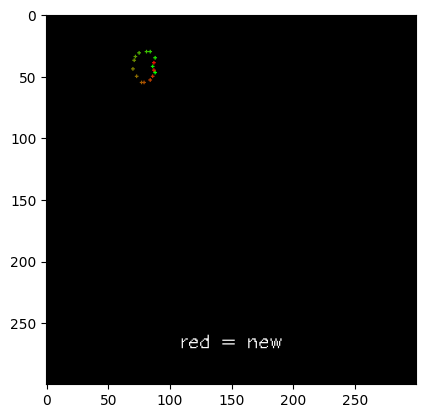

Regular ccw
[109.27928459169225, 48.40733436013548, 101.48938863547424, 46.57806142497925, 90.89800722691928, 43.496659675899465, 77.9252617988003, 41.89227359922569, 67.21168112185858, 42.642488091590074, 54.819450832351016, 42.827814524233574, 44.7919402690582, 45.41241230505442, 37.40299907025661, 48.45778608457057, 30.447994144656803, 52.95820563605062, 30.0, 57.19178018770628, 32.311886581403485, 61.588536446646984, 41.44014706447724, 63.660253849325436, 50.61396147565546, 65.89343332353144, 60.71010420614466, 69.00977028113499, 72.84786547248342, 70.17787140798936, 85.08848293426254, 67.28470758265979]


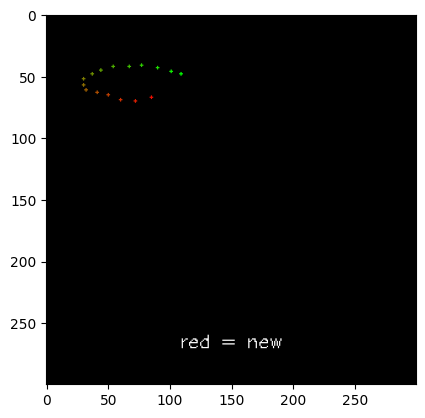

Diverse cw
[43.13996806791014, 66.86149179293338, 42.442710566312556, 68.29655562918299, 40.732234859490845, 69.85050789027963, 39.64528044880731, 71.04205473432401, 40.63492280927005, 71.8053730285477, 37.36914806676536, 70.66899022334235, 36.17667808253887, 71.62163477771392, 35.68597908676225, 70.813138499322, 34.919273283479136, 70.96120151431273, 34.05780389849364, 70.14288400092367, 32.925022945843224, 71.02635752802549, 30.111876806329814, 68.76691683967337, 31.352194893365088, 68.13739686989929, 30.114625870104195, 66.90097908510023, 30.0, 66.4633863082696, 30.284437551284675, 64.69089907314913]


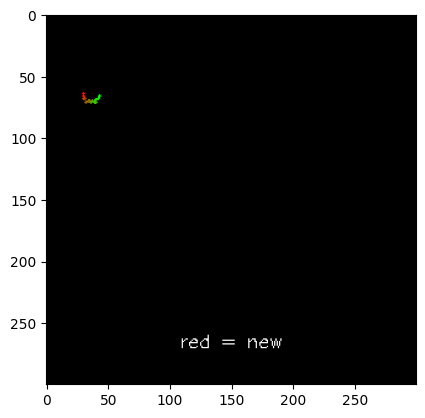

Regular cw
[153.39860845138912, 71.35110030061543, 166.61326295017577, 82.68922505232119, 167.5845343602131, 93.55347785027121, 157.20314210751104, 102.44688463787317, 131.85387000070182, 109.93051718775217, 101.77470980003939, 109.39536857306784, 70.40036706208969, 109.5735338299944, 44.15024011714328, 103.13393917928119, 30.0, 92.69010786446688, 30.50441738818582, 84.33944986712807, 40.527954722415004, 74.21261652074587, 63.94056092020108, 67.92012758051024, 93.48120172434929, 62.064023121455996, 126.20115936061964, 64.89896942783136, 151.2911923077345, 70.50755830880111, 168.08495937795706, 80.01802803768757]


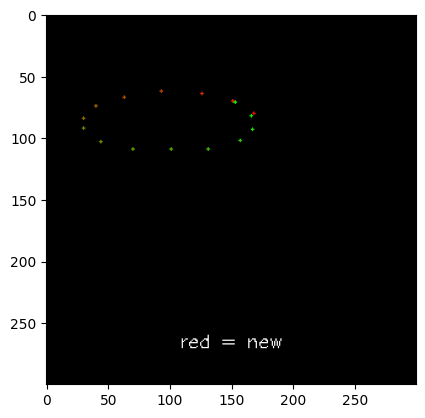

Diverse down
[139.7707670978448, 234.15120214145452, 136.51950307395614, 224.63714621425015, 132.56777374032873, 212.44453689514035, 128.63265855775745, 199.18443468783357, 125.41376147753692, 185.68816765283051, 121.81213159454346, 169.01838434064268, 117.08480446023708, 152.51564822473728, 112.85984917329063, 137.06876904107187, 108.75267636906992, 126.06830708159893, 104.18050912471338, 112.38965896463152, 100.29189499725179, 101.85140230693393, 96.87494188077926, 87.99993249991934, 92.59153810648256, 70.68280787011199, 88.49557217204284, 59.870635601294765, 84.28198350254642, 43.72759612013973, 81.62236647138982, 30.0]


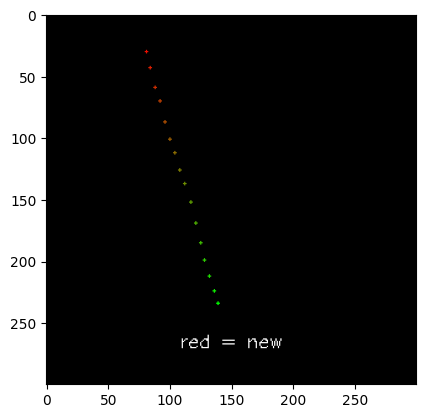

Regular down
[66.85655600680141, 129.2238647892999, 68.02531138475089, 124.66643758464178, 70.66913979490757, 118.93785595771759, 73.75194641485612, 111.48921225125262, 75.24131468212306, 108.97403955440612, 76.17809498889798, 97.67701787563146, 78.84299324703416, 94.63730298858766, 80.91652658772598, 84.54095573222017, 81.89477788060249, 77.12830469825094, 83.83743032877175, 66.4483480578327, 84.0500907716646, 60.12063288395041, 85.88918207121415, 54.30643155272932, 86.69996947557175, 50.28700795647883, 87.52010947743896, 43.92348530786829, 88.48035414809115, 34.870722567095065, 91.84710726677613, 30.0]


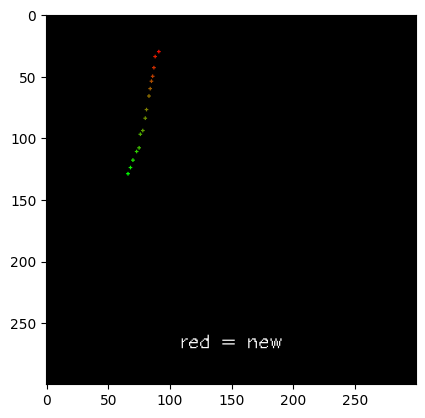

Diverse left
[30.0, 92.04946813186407, 36.110852984762886, 90.7266821482667, 41.84045220302418, 89.34374363133341, 46.49652274445091, 87.96566829823642, 51.317215643393666, 86.65232109785305, 56.47943040592035, 85.42047697700448, 62.13335830523577, 84.00960065417223, 67.929907129657, 82.71662268189976, 72.48977087162439, 81.59577983344448, 77.83266878061751, 80.46936070697352, 82.63298523169637, 79.44669435389604, 88.6330874611031, 78.0031786172879, 94.09232007658728, 76.99131984558875, 99.87072002817484, 75.92955433510147, 105.52592709258404, 74.54179629540853, 110.76100305760166, 73.49259078850154]


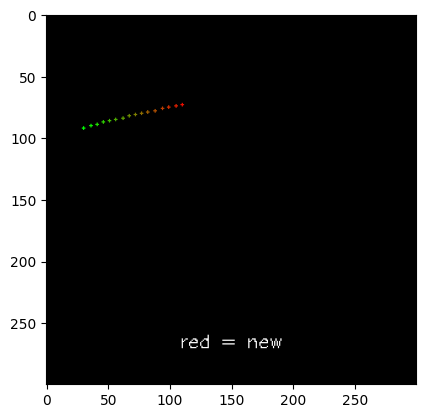

Regular left
[30.0, 47.48368498162514, 32.73273729661059, 47.79387716261785, 36.17860598579133, 48.38077851284, 41.25928209633247, 48.76950944120837, 45.06540953811976, 48.88324683982616, 49.833584787363506, 49.017110466799444, 51.152051915170894, 49.779567323612, 53.79283047606547, 50.22750906612262, 59.93879612006086, 50.808275734245015, 62.269006470588856, 51.242033192364694, 63.48291903268004, 51.32220382591408, 65.09059410601026, 51.87560558007788, 68.51168823136419, 52.32799597914061, 72.65349876404932, 52.69999337979215, 75.37584007747901, 53.203087033105284, 81.55597727967061, 53.8813900717998]


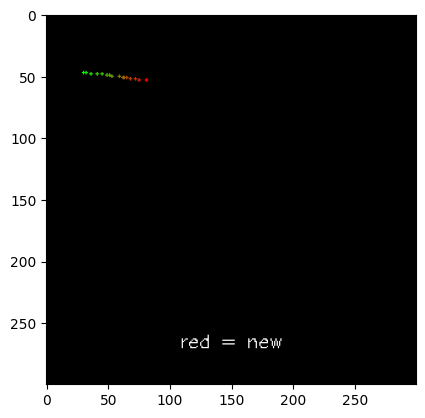

Regular stop
[31.402827473870527, 31.22243842451365, 31.65693203838171, 31.107014599553327, 31.092468575026697, 31.4525736022779, 31.211038846669826, 31.9772705696871, 31.339969595093482, 31.995107889460293, 31.108209957101764, 31.402324163009848, 30.60592329021225, 30.22668887133135, 31.69953946510586, 30.146864909322662, 30.0, 30.22048780874094, 30.686832390950677, 31.219768381917692, 31.10325984732542, 30.57208543150333, 31.134577277845075, 30.719189499185912, 30.568571379355603, 30.182610460874724, 30.70441932056827, 30.57959148539789, 30.423410007289462, 30.076212953218082, 31.22733113238279, 30.146562938788502]


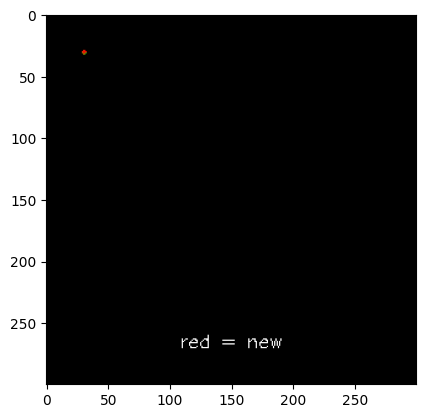

Diverse stop
[31.880233267293768, 30.0, 32.266998381440395, 31.50629685514158, 31.712350209051667, 30.67245451719015, 30.177447258151794, 32.51077509735757, 33.32344182248196, 32.07236067895887, 32.61818522045306, 32.10522158191325, 32.64416775091539, 32.00537400304034, 31.416114527059882, 32.47340079758809, 32.068405195722676, 32.547950217629655, 30.80226091287158, 32.29510147182423, 30.982451812058002, 31.15943477540026, 30.055982010806318, 30.03617429430579, 32.71665611130916, 32.5886342159597, 32.90562708454976, 32.464328313724735, 30.206274855626805, 30.74016076950113, 30.629739604613967, 33.192677311297004]


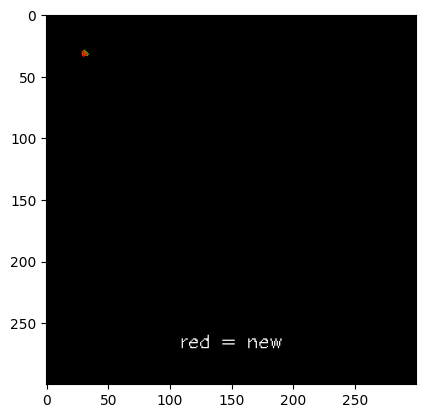

Diverse up
[162.70179271374656, 30.0, 156.4541266962229, 39.61965840807565, 154.44271209714384, 52.96360144594396, 151.53134662668282, 63.616401144162126, 145.46762257526294, 76.54017693512753, 143.03186158806477, 91.86395936894606, 140.33697647597774, 98.17244630871129, 135.76140597533913, 102.80385033611417, 128.314460676644, 108.49569211874929, 116.07227884158573, 121.36221283358775, 103.77150225248802, 126.66114215764078, 92.74581595550507, 141.58563137974187, 88.07711616880454, 148.69745659792824, 86.1269500345285, 159.1628798752921, 79.71207978889265, 167.87116111168038, 69.22841579160726, 171.18973536658905]


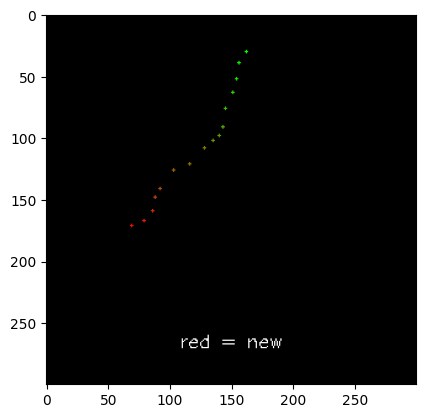

Diverse erratic
[197.5577353530266, 66.91288046567826, 211.10071633290428, 30.98237800206689, 183.6533658536186, 60.42996811319952, 192.59539090328076, 48.71540267575037, 169.7933969871966, 35.82939690366743, 188.5844650504421, 46.146148959579804, 152.41106857953335, 44.31882229650065, 130.3574886177446, 49.07243101450522, 102.37624595210006, 88.67447178860516, 105.08286527959147, 82.7943191383805, 122.61772910361616, 104.29962718838291, 81.71157724575855, 113.01662462208367, 100.07232397324573, 88.15436681408984, 143.66606936796612, 91.34847111239097, 136.47303629732826, 68.19700280217003, 142.85898743915845, 30.0]


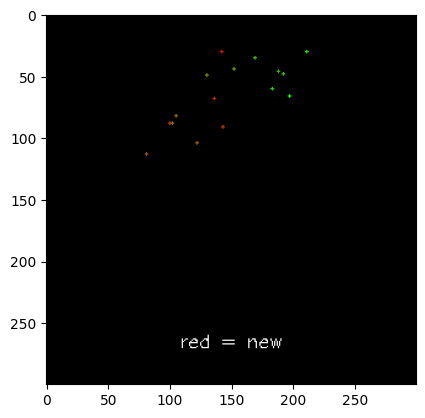

Regular erratic
[80.50164448303809, 213.85844628394705, 57.37352255987264, 185.28527485143422, 30.0, 184.40300054481352, 44.83066521961521, 191.52324534639666, 50.41028342723486, 226.77729195353336, 37.40401172931667, 238.60469172672444, 78.45933562851022, 228.30099181810178, 67.2519653009768, 209.38049137253566, 86.16359898990518, 238.69987805787537, 81.37966108019629, 202.213772066906, 90.09208292104123, 202.02362453932668, 120.20670836840654, 198.19873834730242, 116.97822166587999, 165.1294399557355, 121.67534194622152, 193.47166029072378, 128.48080659700588, 174.95604433024542, 165.21991256073082, 157.8530045632242]


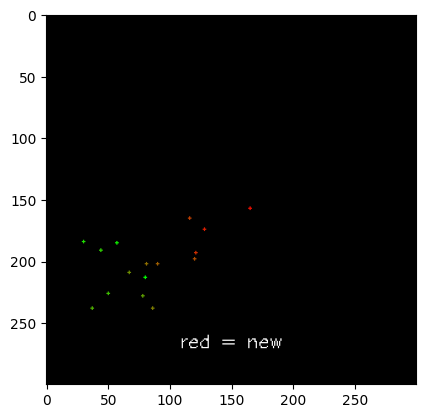

Regular right
[137.28242099458697, 96.76355334870469, 130.22366097593178, 94.9712415134577, 122.88352532951906, 93.28435218717811, 116.06611491943194, 91.4113489615618, 109.75981384748557, 89.77218783550644, 103.11184474046907, 87.8393097271609, 95.93783840866486, 85.97804848121379, 88.2412919362504, 84.43216881711038, 81.70652201093122, 82.52666774783398, 73.66585975522493, 80.73404833817807, 66.09820609947295, 79.13411489902705, 58.59335361336085, 77.4111641863447, 51.47041379891091, 75.52529487340522, 43.672455025823645, 73.60367577713902, 36.4835078008034, 71.94207387660359, 30.0, 69.9827100762114]


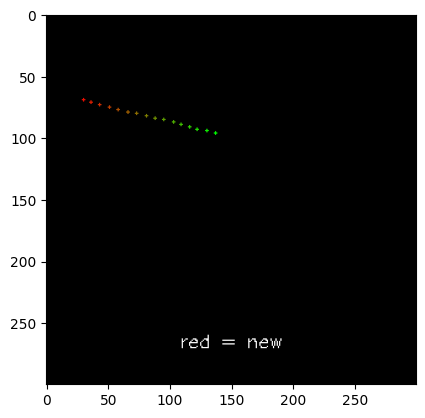

Diverse right
[143.15634477526567, 110.27887334884862, 134.751092684477, 109.14373628815572, 123.58326873875248, 105.60248119952993, 113.87718716653588, 104.66735788504661, 103.53653037846169, 103.6610273691914, 93.62033704938358, 101.89190504235984, 90.37200718142313, 99.67166679256046, 85.61645097322578, 97.19423904779026, 78.142814101227, 95.33940346348167, 74.3463389590155, 91.72829996984359, 62.66361782324829, 89.93279755370429, 60.15076109252137, 87.54675919604429, 51.883197061131824, 84.83613373180057, 48.035708751906725, 83.28917490146222, 37.21116800095199, 78.74195834417183, 30.0, 75.32264025133092]


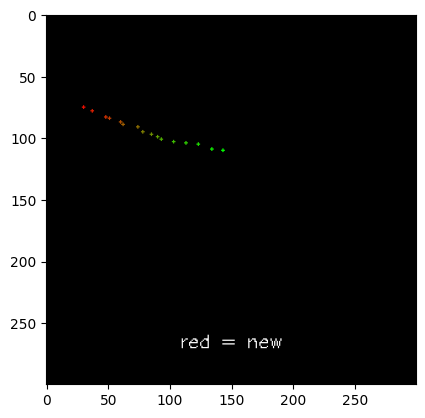

Regular up
[64.52692731961955, 30.0, 62.7246323665495, 34.64054757697148, 61.11587706092141, 38.4977816642394, 59.112889719238524, 42.23267713657862, 57.47204902090491, 45.681860278544946, 55.599200447402104, 50.33960394674773, 54.417692666811405, 54.12596108552154, 53.1966590669096, 58.344681284490726, 51.79090985725644, 60.80584346862149, 49.508209979867075, 64.78589671636378, 48.29471565547108, 68.648616908858, 46.433135113481285, 73.56576645906807, 45.11982773052465, 76.03618350383707, 43.765557641128765, 80.80677834087273, 41.99636913705294, 84.08121371024801, 39.634718648047794, 87.7600714385566]


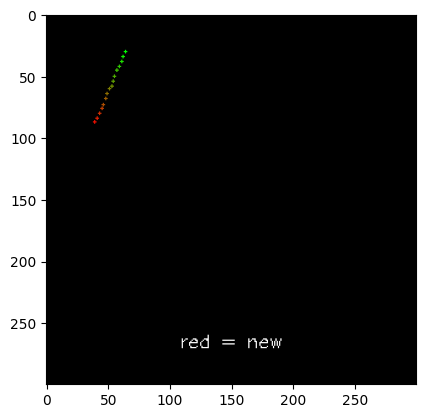

In [1266]:
csv2label = {
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_ccw_2.csv": "Diverse ccw",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_ccw_2.csv": "Regular ccw",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_cw_1.csv": "Diverse cw",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_cw_1.csv": "Regular cw",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_downswipe_4.csv": "Diverse down",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_downswipe_4.csv": "Regular down",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_leftswipe_6.csv": "Diverse left",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_leftswipe_6.csv": "Regular left",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_stop_0.csv": "Regular stop",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_stop_0.csv": "Diverse stop",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_upswipe_5.csv": "Diverse up",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_erratic_3.csv": "Diverse erratic",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_erratic_3.csv": "Regular erratic",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_rightswipe_7.csv": "Regular right",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\diverse_synthetic_rightswipe_7.csv": "Diverse right",
    r"C:\my_files\code\kinivi_gesture_train\train-point-history-classifier\isolated_gesture_sets\synthetic_upswipe_5.csv": "Regular up",
}

for csv_path, label in csv2label.items():
    show_random_datum(csv_path, label)